<div class="alert alert-success">
<b>Review summary, v. 3</b> 
    
Miguel, thank you for the updates. Excellent job. All critical comments fixed. 
    
The project is complete, congratulations.
    
    
Good luck to you with the next projects.

# Project description
 
 from raw dataset of **Instacart**, will take multiple data sets where we record information about the client perform, the product ordered by customer and information of the product.

The project purpose is to take those dataset and preprocessing, remove duplicates and edit the missing values. used the relationship between the dataset then will be processing and analyzing this data.

The five dataset files were in csv format, the information included are record of orders from client, product information, product ordered, location of the product classified by departments and aisle.


Load Libraries, Pandas, Numpy, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # moved v. 1

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_orders.info(show_counts=True)
display(df_orders[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_products.info(show_counts=True)
print()
display(df_products[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_aisles.info(show_counts=True)
print()
display(df_aisles[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_products.info(show_counts=True)
print()
display(df_products[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_departments.info(show_counts=True)
print()
display(df_departments[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_order_products.info(show_counts=True)
print()
display(df_order_products[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusion
All csv files are not standad format because the separion were whith ';'.
**instacart_orders.csv** include six columns, the column 'days_since_prior_order' indicted missing values.
**products.csv** include 4 columns ‘product_name’ missing information

**aisles.csv** two columns no missing data

**departments.csv**  how 21 departments

**Order_products.csv**  the column ‘add_to_cart_order’ show missing values.


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great - you've used optimal methods to have a first look at the data.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
display(df_orders[df_orders.duplicated()])
print()
print('Total number duplicated :',df_orders.duplicated().sum())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN



Total number duplicated : 15


In [9]:
# Check for all orders placed Wednesday at 2:00 AM

display(df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)])
print()
print(df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)].duplicated().sum())


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0



15


In [10]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates()

In [11]:
# Double check for duplicate rows
display(df_orders.value_counts())
print()
print(df_orders.duplicated().sum())

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
4         178520   36            1          9                  7.0                       1
2278863   97255    4             5          18                 30.0                      1
2278985   93596    11            5          13                 23.0                      1
2278978   72281    21            3          16                 7.0                       1
2278962   188803   4             5          14                 0.0                       1
                                                                                        ..
1141845   153218   2             3          8                  6.0                       1
1141835   120105   16            4          10                 15.0                      1
1141834   92229    8             5          14                 26.0                      1
1141833   26712    27            3          13                 6.0                       1
3421


0


In [12]:
# Double check for duplicate order IDs only
dup_order_id = df_orders['order_id'].value_counts()

print(dup_order_id.sort_values(ascending=False).head(10))

1048576    1
3203100    1
3168267    1
1073164    1
1079311    1
2129936    1
402526     1
2136083    1
40980      1
325216     1
Name: order_id, dtype: int64


use the duplicated() and sum() method to find the total of the dataframe

use multiple condition to check duplicate orders on Wednesday at 2 am
 With the drop_duplicates() method I eliminated the duplicates in the dataframe
second verification that there will be no duplicates using value_counts() and duplicated() and sum() method

Finally, order the data in the 'order_id' column in descending order after applying the value_counts() method.

The result shows that they are all unique values

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Well done - you've completed all the necessary checks and transformations and wrote a conclusion.

### `products` data frame

In [13]:
# Check for fully duplicate rows
print(df_products[df_products.duplicated()])
print()
print('Total number duplicated :',df_products.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

Total number duplicated : 0


In [14]:
# Check for just duplicate product IDs
#print(df_products.head())
print('Total number duplicated by product Id:',df_products['product_id'].duplicated().sum())

Total number duplicated by product Id: 0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
print(df_products['product_name'].str.lower().duplicated().sum())

1361


In [16]:
# Check for duplicate product names that aren't missing
print(df_products['product_name'].isna().sum())

1258


In [17]:
#Added by the reviewer

# Check for duplicate product names that aren't missing
df_products[df_products['product_name'].notna() & df_products['product_name'].str.lower().duplicated()]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Comment: Please, explain more about this observation.  how could change to blue color

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 3</b> 
    
✔️ You may step on the blue cell below and write inside it. You may copy the code inside it to make a similar cell highlighted with blue.
    
The explanation for what we see here that most of the duplicates were containing nulls in product name. And only 104 had the product name not missing.
    
<a class="tocSkip"></a><s>



<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
All the rest you did very well here.

no duplicate rows were found, we tried only with the 'product_id' column and there were no duplicates, we also tried to verify if there were duplicates in the 'product_name' column if duplicates were found (1361) which (1258) are missing information in that column. Before removing duplicates, it requires filling in the missing information.

### `departments` data frame

In [18]:
# Check for fullly duplicate rows
print('Total number duplicates :',df_departments.duplicated().sum())
print()
print(df_departments.info())
print()
print(df_departments.head())

Total number duplicates : 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [19]:
print('\'department_id\' number duplicates :',df_departments['department_id'].duplicated().sum())
print()
print('\'department\' number duplicates :',df_departments['department'].str.lower().duplicated().sum())

'department_id' number duplicates : 0

'department' number duplicates : 0


21 row include on the dataframe, was testing for duplicated row the result show negative.
also was testing by departament column the conclution no duplicate below these dataframe

### `aisles` data frame

In [20]:
# Check for fullly duplicate rows
print(df_aisles[df_aisles.duplicated()])
print()
print('Total number duplicates :',df_aisles.duplicated().sum())
print()
print(df_aisles.info())
print()
print(df_aisles.head())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Total number duplicates : 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [21]:
print('\'aisle_id\' number duplicates :',df_aisles['aisle_id'].duplicated().sum())
print()
print('\'aisle\' number duplicates :',df_aisles['aisle'].str.lower().duplicated().sum())

'aisle_id' number duplicates : 0

'aisle' number duplicates : 0


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
OK, you are right there are no duplicates in both dataframes.

### `order_products` data frame

In [22]:
# Check for fullly duplicate rows
print(df_order_products[df_order_products.duplicated()])
print()
print('Total number duplicates :',df_order_products.duplicated().sum())
print()
print(df_order_products.info())
print()
print(df_order_products.head())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

Total number duplicates : 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [23]:
# Double check for any other tricky duplicates
print('first 10 \'Order_id\' duplicates : ...' )
print(df_order_products['order_id'].value_counts().head(10))
print('first 10 \'Product_id\' duplicates :...')
print(df_order_products['product_id'].value_counts().head(10))

first 10 'Order_id' duplicates : ...
61355      127
3308010    115
2136777    108
171934     104
1959075     98
102236      95
1730767     95
1800005     92
2926893     92
1386261     91
Name: order_id, dtype: int64
first 10 'Product_id' duplicates :...
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
Name: product_id, dtype: int64


In [24]:
print(df_order_products[['order_id', 'product_id']].duplicated().sum())

0


Order and Product dataframe indicate include all information regarding product was ordered and product number by order.
duplicates test order_id and product_id indicate no duplicates, in order to add product_id value to order_id I multiplicated by 100000 to not make ariment addition just merge both values.


## Find and remove missing values


### `products` data frame

In [25]:
# Check for fullly Missing values rows
print('Total missing values :',df_products.isna().sum())


Total missing values : product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [26]:
# Are all of the missing product names associated with aisle ID 100?
print('Total missing values aisle ID 100 :',df_products[df_products['aisle_id']==100].isna().sum())


Total missing values aisle ID 100 : product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [27]:
# Are all of the missing product names associated with department ID 21?
print('Total missing values department ID 21 :',df_products[df_products['department_id']==100].isna().sum())

Total missing values department ID 21 : product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You've performed excellent checks.

In [28]:
# What is this ailse and department?
# those are integer data type those values associate with others dataframe 

aisle_depar = df_products.merge(df_aisles, on='aisle_id', how='left')
aisle_depar = aisle_depar.merge(df_departments, on='department_id', how='left')


display(aisle_depar[:10])

display(aisle_depar[:20].drop(['product_id','aisle_id', 'department_id'], axis='columns'))

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
5,6,Dry Nose Oil,11,11,cold flu allergy,personal care
6,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages


,product_name,aisle,department
0,Chocolate Sandwich Cookies,cookies cakes,snacks
1,All-Seasons Salt,spices seasonings,pantry
2,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,Green Chile Anytime Sauce,marinades meat preparation,pantry
5,Dry Nose Oil,cold flu allergy,personal care
6,Pure Coconut Water With Orange,juice nectars,beverages
7,Cut Russet Potatoes Steam N' Mash,frozen produce,frozen
8,Light Strawberry Blueberry Yogurt,yogurt,dairy eggs
9,Sparkling Orange Juice & Prickly Pear Beverage,water seltzer sparkling water,beverages


In [29]:
#To display the name of department 21 you can do the following:
#df_departments[df_departments['department_id'] == 21]

display(df_departments[df_departments['department_id'] == 21])

,department_id,department
20,21,missing


In [30]:
# Could you please use a similar approach to get the name of aisle with ID 100?
display(df_aisles[df_aisles['aisle_id'] == 100])

,aisle_id,aisle
99,100,missing


In [31]:
# Fill missing product names with 'Unknown'
df_products = df_products.fillna('Unknown') 
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


Identifying missing values helps to preprocess the dataset, to avoid wrong calculation, or wrong match information.

Cross information between dataframe help to complete information, rather than keep a single table to help manage independent the dataset.

Cross information between dataframe help to complete information, rather than keep a single table to help manage independent the dataset.
In order to get the product, the aisle and department dataset together will create a copy to keep the product table without any planning edition. Then used consecutive merge after that drop the no necessary columns.

We checked the dataframe for the missing values, and found out that 1258 product names were missing. We investigated that all of them were associated with the same department (21) and aisle (100). So we checked what are the department and the aisle and discovered that they names of those department are 'Missing'.

### `orders` data frame

In [32]:
# Check for fullly Missing values rows
print('Missing values :\n',df_orders.isna().sum())
print('information of dataframe ...')
print(df_orders.info())

Missing values :
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
information of dataframe ...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB
None


In [33]:
# Are there any missing values where it's not a customer's first order?
print(df_orders[df_orders['order_number'] == 1].isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


Instacart order dataframe are missing values below customer placed their previous order when did the first order.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Yes, you are right, all the missing values are associated with the first customer order, which is valid.
    

### `order_products` data frame

In [34]:
# Check for fullly Missing values rows
print('Total missing values : \n',df_order_products.isna().sum())

Total missing values : 
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [35]:
# What are the min and max values in this column?

#print([df_order_products.min(),df_order_products.max()])
print(pd.concat([df_order_products.min(),df_order_products.max()],axis=1, keys=['Min','Max']))


                   Min        Max
order_id           4.0  3421079.0
product_id         1.0    49694.0
add_to_cart_order  1.0       64.0
reordered          0.0        1.0


In [36]:
#print(pd.concat([df_order_products['add_to_cart_order'].min(),df_order_products['add_to_cart_order'].max()], axis=1, keys=['Min','Max']))
print('Minimum value for product_id :',df_order_products['product_id'].min(),'\nMaximum value for product_id :',df_order_products['product_id'].max())
print('Minimum value for add_to_cart_order :',df_order_products['add_to_cart_order'].min(),'\nMaximum value for add_to_cart_order :',df_order_products['add_to_cart_order'].max())

Minimum value for product_id : 1 
Maximum value for product_id : 49694
Minimum value for add_to_cart_order : 1.0 
Maximum value for add_to_cart_order : 64.0


In [37]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
one_missing = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(one_missing.head())


737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
Name: order_id, dtype: int64


In [38]:
# Do all orders with missing values have more than 64 products?
more64 = df_order_products[(df_order_products['add_to_cart_order'] > 64) & (df_order_products['add_to_cart_order'].isna())]
print(more64)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [39]:
#Save the IDs of the orders with missing 'add_to_cart_order' to a list.
print(df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'])
df_order_missing2 = df_order_products[df_order_products['add_to_cart_order'].isna()]
display(df_order_missing2[:5])

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [40]:
print(df_order_missing2.groupby('order_id').size().sort_values())

order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Length: 70, dtype: int64


In [41]:
#Added by the reviewer 

# 1.  Save the IDs of the orders with missing add_to_cart_order to a list.
missing_order_ids = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']

# 2. select all the rows attributed to the orders
missing_orders_full = df_order_products[df_order_products['order_id'].isin(missing_order_ids)]

# 3. Group this new dataframe by order ID and check sizes of those groups - to find the minimum size.
print(missing_orders_full.groupby('order_id').size().sort_values())


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64


In [42]:
# Replace missing values with 999 and convert column to integer type
df_order_products.info()
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype('int')
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


The Order_product dataset indicated missing values on ‘add_to_cart_order’ values (836)
On the display values minimum and maximum indicate maximum products added in the car is 64.


No possible to do all order with more than 64 products


I used the astype() method to convert to integer column


# [A] Easy (must complete all to pass)

In [43]:

# import matplotlib.pyplot as plt
# move to beginning after v.1

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [44]:
print(df_orders.groupby('order_hour_of_day')['order_hour_of_day'].count())

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [45]:
print(df_orders.groupby('order_dow')['order_dow'].count())

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


The Column ‘order_hour_of_day’ is recorded when the client summit the order, this record could help to complete the task by grouping and counting the number record for each group.

The column ‘order_dow’ records the day of the week from 0 to 6 it is recorded similar to ‘order_hour_of_day’ however we could use the same method to find the number order by day.


### [A2] What time of day do people shop for groceries?

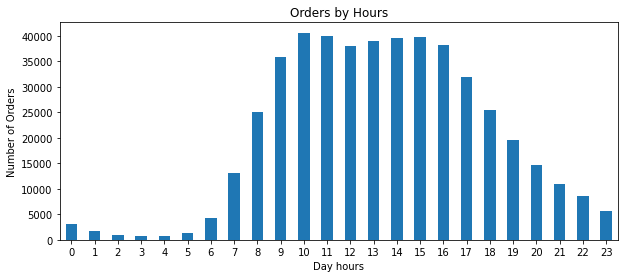

In [46]:
# Create a plot that shows how many people place orders for each hour of the day.

hoursbyuser = df_orders.groupby('order_hour_of_day')['order_hour_of_day'].count()
hoursbyuser.plot(x=hoursbyuser, kind='bar', title='Orders by Hours',
               xlabel='Day hours', ylabel='Number of Orders',rot=0, figsize=(10,4)
                )

plt.show()

The chart ‘Orders by hours’ indicate that between 9am to 16 hours ar highest orders about 7 timer more compared with lowes time 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You plotted a flawless chart and your explanation is correct.

### [A3] What day of the week do people shop for groceries?

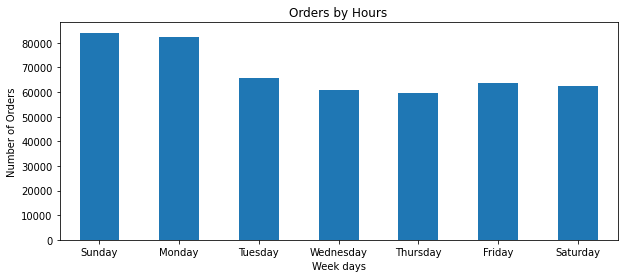

In [47]:
# Create a plot that shows what day of the week people shop for groceries.
weekbay = df_orders.groupby('order_dow')['order_dow'].count()
ax = weekbay.plot(x=weekbay, kind='bar', title='Orders by Hours',
               xlabel='Week days', ylabel='Number of Orders',rot=0, figsize=(10,4)
                )
ax.set_xticklabels(['Sunday','Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday'])

plt.show()

The bar chart indicates that sunday and monday are the highest orders however do not show big differences between days.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
You are absolutely right.

### [A4] How long do people wait until placing another order?

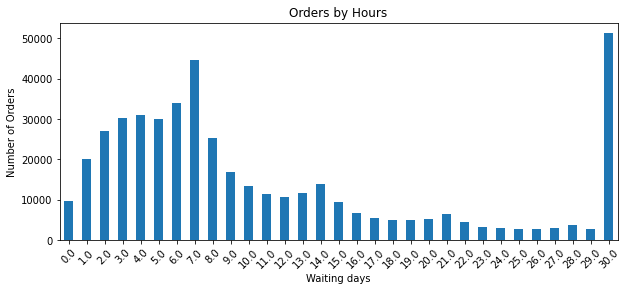

In [48]:
# Create a plot that shows how long people wait until placing their next order, 
#  and comment on the minimum and maximum values.
waitingdays = df_orders.groupby('days_since_prior_order')['days_since_prior_order'].count()
waitingdays.plot(x=waitingdays, kind='bar', title='Orders by Hours',
               xlabel='Waiting days', ylabel='Number of Orders',rot=45, figsize=(10,4)
                )
plt.show()

On the chart 6 and 7 waiting days, this indicates the mayer client orders weekly however a bigger number who order ones a month or more are more.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Indeed.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

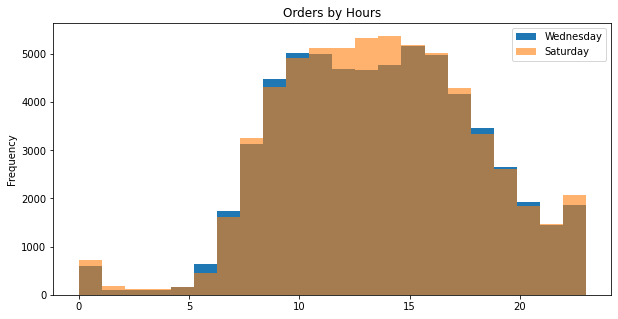

In [49]:
df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist',bins=22, figsize=(10,5),
               title='Orders by Hours')
df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist',bins=22, alpha=0.6)

plt.legend(['Wednesday', 'Saturday'])
plt.show()

The column ‘order_dow’ from orders data was recording the week day, from 0 to 6, Wednesday is value 3 and Saturday value 6.
Filter the data and take the ‘order_hour_of_day’ then display histogram to compare the values.
The histogram indicates similarity between both days in a mount order by hours. Very close correlation.


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
All perfect - you draw a chart that clearly answers the question and provided good interpretation of it.

### [B2] What's the distribution for the number of orders per customer?

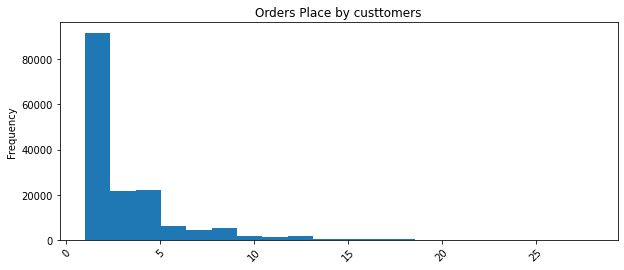

In [50]:
# Plot the distribution for the number of orders that customers place 
# (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

number_of_orders = df_orders.groupby('user_id')['order_number'].count()
number_of_orders.plot(kind='hist',bins=20, title='Orders Place by custtomers',
               rot=45, figsize=(10,4)
                )

plt.show()  # add after review v.1

In [51]:
# Statistic information
print(number_of_orders.describe())

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_number, dtype: float64


From 1 to 5 orders were placed for more than 1000 clients.

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Yes, you are right.

### [B3] What are the top 20 popular products (display their id and name)?

In [52]:
top20data = df_order_products.merge(df_products,on='product_id')

top20 = top20data.groupby(['product_id', 'product_name'])['product_id'].count()
top20 = top20.sort_values(ascending=False).head(20)
print(top20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: product_id, dtype: int64


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
This is a good list.

In [53]:
#verify with select only product _id from df_order_products
print(df_order_products.groupby(['product_id'])['product_id'].count().sort_values(ascending=False).head(20))


product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


Merge the two dataframe order_product and products, preserve the total rows from order product, then grouping by ‘prodict_id’ and ‘product_name’ counts the total order for each product.
Sort in descending then take only the first 20 products.

To verify I created the the top 20 from df_order_products only


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [54]:
df_order_products.info()
print(df_order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


In [55]:
print(df_order_products.groupby('order_id')['product_id'].count().mean())

10.098983215049127


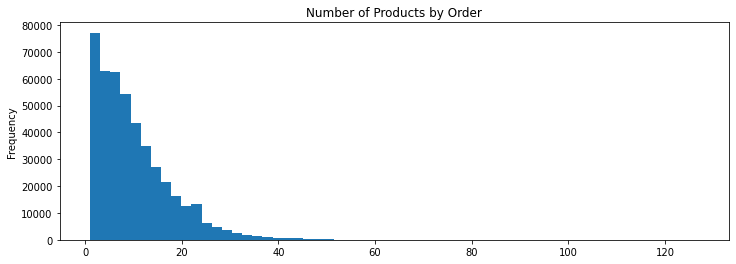

In [56]:
NumProdbyOrder = df_order_products.groupby('order_id')['product_id'].count()
NumProdbyOrder.plot(kind='hist', bins=60, title='Number of Products by Order',
               rot=0, figsize=(12,4))

plt.show()

The distribution according the histogram show  skewed to the right


### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [57]:
df_reordered = df_order_products[df_order_products['reordered'] == 1]
print(df_order_products.shape)
print(df_reordered.shape)

(4545007, 4)
(2683838, 4)


In [58]:
top20reordered = df_reordered.merge(df_products,on='product_id')

top20Count = top20reordered.groupby(['product_id', 'product_name'])['product_id'].count()
top20Count = top20Count.sort_values(ascending=False).head(20)
print(top20Count)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: product_id, dtype: int64


Filter the reordered row from order_products dataframe. Then inner merge with product dataframe, group by product id and product name, count the total product for each product, sorting descending then select the first 20 product 

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great job.

### [C3] For each product, what proportion of its orders are reorders?

In [59]:

df_total_products = df_order_products.groupby(['product_id'])['product_id'].count()
df_total_Noreord = df_order_products[df_order_products['reordered']==0].groupby(['product_id'])['product_id'].count()
df_total_reord = df_order_products[df_order_products['reordered']==1].groupby(['product_id'])['product_id'].count()

In [60]:
print(pd.concat([df_total_products,df_total_Noreord,df_total_reord],axis=1, keys=['Total','Never_Ordered', 'Ordered']))

            Total  Never_Ordered  Ordered
product_id                               
1             280          122.0    158.0
2              11           11.0      NaN
3              42           11.0     31.0
4              49           24.0     25.0
7               2            1.0      1.0
...           ...            ...      ...
49690           5            1.0      4.0
49691          72           41.0     31.0
49692          12            7.0      5.0
49693          25           14.0     11.0
49694           9            6.0      3.0

[45573 rows x 3 columns]


In [61]:
df_proportion = pd.concat([df_total_products,df_total_Noreord,df_total_reord],axis=1, keys=['Total','Never_Ordered', 'Ordered'])
df_proportion['proportionNO'] = df_proportion['Never_Ordered'] / df_proportion['Total']
df_proportion['proportionO'] = df_proportion['Ordered'] / df_proportion['Total']

print(df_proportion.head())


            Total  Never_Ordered  Ordered  proportionNO  proportionO
product_id                                                          
1             280          122.0    158.0      0.435714     0.564286
2              11           11.0      NaN      1.000000          NaN
3              42           11.0     31.0      0.261905     0.738095
4              49           24.0     25.0      0.489796     0.510204
7               2            1.0      1.0      0.500000     0.500000


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Yes, you can do it this way. However, an easier way to complete the task is to group the merged dataframe by `product_id` and calculate the mean of `reordered` columns. This will be proportion of reorders for each product.

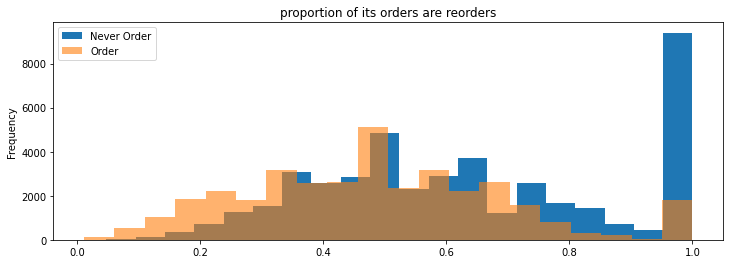

In [62]:
df_proportion['proportionNO'].plot(kind='hist', bins=20, title='proportion of its orders are reorders',
                                 figsize=(12,4))
df_proportion['proportionO'].plot(kind='hist', bins=20, alpha=.6)

plt.legend(['Never Order','Order'])
plt.show()

### [C4] For each customer, what proportion of their products ordered are reorders?

In [63]:
# merge df_order_products and df_orders by 'order_id'
df_customer = df_order_products.merge(df_orders, on='order_id')
print(df_customer.head())
print(df_customer.shape)
print(df_order_products.shape)
print(df_orders.shape)



   order_id  product_id  add_to_cart_order  reordered  user_id  order_number  \
0   2141543       11440                 17          0    58454            25   
1   2141543       31869                 15          1    58454            25   
2   2141543       30233                  9          1    58454            25   
3   2141543       27966                 20          1    58454            25   
4   2141543       13176                  2          1    58454            25   

   order_dow  order_hour_of_day  days_since_prior_order  
0          0                 15                     8.0  
1          0                 15                     8.0  
2          0                 15                     8.0  
3          0                 15                     8.0  
4          0                 15                     8.0  
(4545007, 9)
(4545007, 4)
(478952, 6)


In [64]:
df_total_user = df_customer.groupby(['user_id'])['product_id'].count()
df_user_Noreord = df_customer[df_customer['reordered']==0].groupby(['user_id'])['product_id'].count()
df_user_reord = df_customer[df_customer['reordered']==1].groupby(['user_id'])['product_id'].count()
print(pd.concat([df_total_user,df_user_Noreord,df_user_reord],axis=1, keys=['Total','Never_Ordered', 'Ordered']).fillna(0))

         Total  Never_Ordered  Ordered
user_id                               
2           26           25.0      1.0
4            2            2.0      0.0
5           12            4.0      8.0
6            4            4.0      0.0
7           14            1.0     13.0
...        ...            ...      ...
206203      27           21.0      6.0
206206      21            6.0     15.0
206207      46            5.0     41.0
206208     125           38.0     87.0
206209      25           17.0      8.0

[149626 rows x 3 columns]


In [65]:
df_user_prop=pd.concat([df_total_user,df_user_Noreord,df_user_reord],axis=1, keys=['Total','Never_Ordered', 'Ordered']).fillna(0)

df_user_prop['proportionNO'] = df_user_prop['Never_Ordered'] / df_user_prop['Total']
df_user_prop['proportionO'] = df_user_prop['Ordered'] / df_user_prop['Total']

print(df_user_prop.head())

         Total  Never_Ordered  Ordered  proportionNO  proportionO
user_id                                                          
2           26           25.0      1.0      0.961538     0.038462
4            2            2.0      0.0      1.000000     0.000000
5           12            4.0      8.0      0.333333     0.666667
6            4            4.0      0.0      1.000000     0.000000
7           14            1.0     13.0      0.071429     0.928571


In [66]:
# Added by the reviewer

df_order_products.merge(df_orders, on='order_id').groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

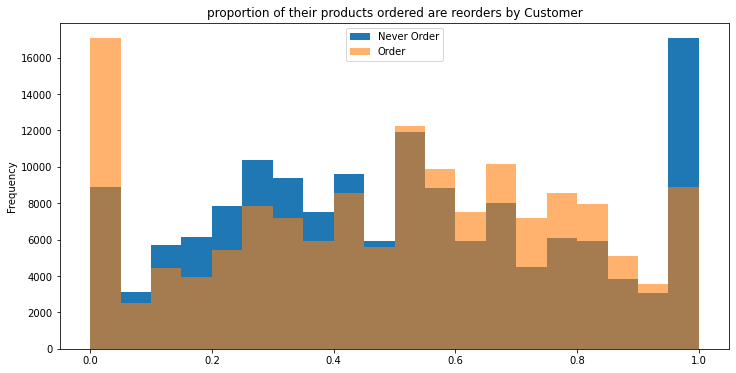

In [67]:
df_user_prop['proportionNO'].plot(kind='hist', bins=20, title='proportion of their products ordered are reorders by Customer',
                                 figsize=(12,6))
df_user_prop['proportionO'].plot(kind='hist', bins=20, alpha=.6)

plt.legend(['Never Order','Order'])
plt.show()

### [C5] What are the top 20 items that people put in their carts first? 

In [68]:
top20items = df_order_products.merge(df_products,on='product_id')
print(top20items.head())


   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
4   1728338       11440                 23          0   

                     product_name  aisle_id  department_id  
0  Chicken Breast Tenders Breaded       129              1  
1  Chicken Breast Tenders Breaded       129              1  
2  Chicken Breast Tenders Breaded       129              1  
3  Chicken Breast Tenders Breaded       129              1  
4  Chicken Breast Tenders Breaded       129              1  


In [69]:
top20items = top20items[top20items['add_to_cart_order']==1]
print(top20items.head())

    order_id  product_id  add_to_cart_order  reordered  \
6    1463503       11440                  1          0   
17   2201430       11440                  1          1   
21   1036054       11440                  1          1   
50   3008652       11440                  1          1   
62   2946144       11440                  1          1   

                      product_name  aisle_id  department_id  
6   Chicken Breast Tenders Breaded       129              1  
17  Chicken Breast Tenders Breaded       129              1  
21  Chicken Breast Tenders Breaded       129              1  
50  Chicken Breast Tenders Breaded       129              1  
62  Chicken Breast Tenders Breaded       129              1  


In [70]:

top20count = top20items.groupby(['product_id','product_name'])['product_id'].count()
top20count = top20count.sort_values(ascending=False).head(20)
print(top20count)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Inner merge order_product and df_product dataframe by product_id
Filter the first ‘add_to_cart_order’ value and create the data frame.
Create the group by product id and product name and count the unique items sorted in descending order then select the first 20 rows.


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Here again you made an excellent list .

# Project goal was completed successfully.

**Pandas** help to create the dataframe from all dataset instead those files have no standard format. Also was checked with the info() method the status of the load file. The number columns and name, the number of rows by file and data type.

The next stage was preprocessing those dataframe checks, duplicates and some cases editing, verifying missing data full rows and some case key columns. Also were edited to add information.

I Analyzed the data and built the distribution chart using a bar and histogram.
Those analyses help to understand the client's performance when ordering a product, the time and day most frequency to make orders, and select the major product order, the comparison new order. and previous orders.

Pandas library includes all sets of methods to completely manage the dataset. With matplotlib to produce the plots chart.
